In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [4]:
student_maths_perf_df = pd.read_csv('../artifacts/maths_performance_transformed.csv', sep=";")
print(student_maths_perf_df.columns)
student_maths_perf_df.shape

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


(395, 33)

In [5]:
X, y = student_maths_perf_df.drop(['G3'], axis=1), student_maths_perf_df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(316, 32)
(316,)
(79, 32)
(79,)


### Create an Evaluate Function to give all metrics after model Training ###

In [6]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate train and test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0909
- Mean Absolute Error: 0.0610
- R2 Score: 0.8442
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0910
- Mean Absolute Error: 0.0564
- R2 Score: 0.8286


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1632
- Mean Absolute Error: 0.1252
- R2 Score: 0.4986
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1948
- Mean Absolute Error: 0.1501
- R2 Score: 0.2150


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0902
- Mean Absolute Error: 0.0487
- R2 Score: 0.8318


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0301
- Mean Absolute Error: 0.0183
- R2 Score: 0.98

### Results ###

In [8]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
3,Random Forest Regressor,0.879805
8,CatBoosting Regressor,0.857218
7,XGBRegressor,0.855498
4,AdaBoost Regressor,0.845483
2,Decision Tree,0.831801
0,Linear Regression,0.828574
6,Ridge,0.826079
1,K-Neighbors Regressor,0.215000
5,Lasso,-0.025289


### Random Forest Regressor ###

In [9]:
forest_regressor = RandomForestRegressor(n_estimators=128)
forest_regressor = forest_regressor.fit(X_train, y_train)
y_pred = forest_regressor.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy: {score}")

Accuracy: 87.35060393030084


### Plot y_pred and y_test ###

Text(0, 0.5, 'Predicted')

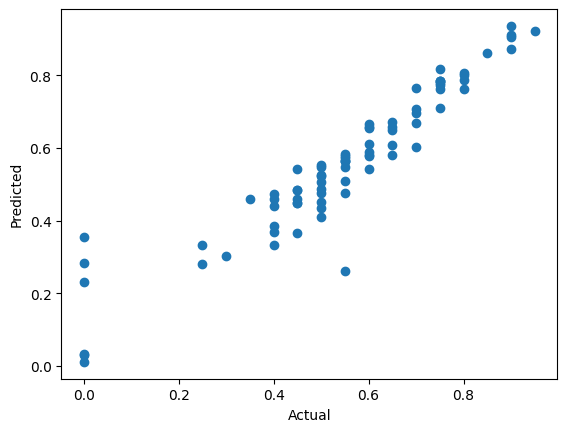

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot: xlabel='G3'>

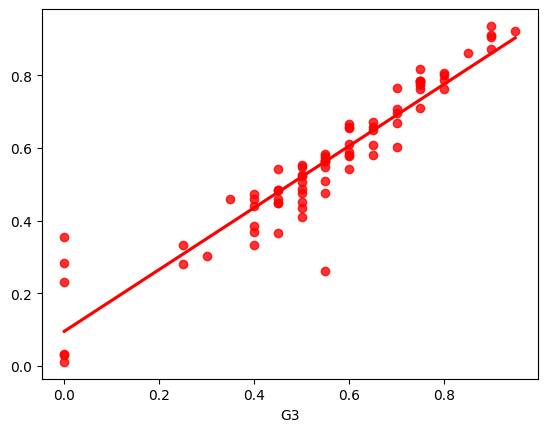

In [11]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference between Actual and Predicted Values ###

In [12]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
142,0.55,0.563672,-0.013672
135,0.00,0.030859,-0.030859
77,0.55,0.563281,-0.013281
232,0.45,0.448047,0.001953
118,0.40,0.369922,0.030078
...,...,...,...
69,0.80,0.786719,0.013281
293,0.90,0.935938,-0.035938
383,0.00,0.010937,-0.010937
370,0.45,0.365625,0.084375


### Linear Regressor ###

In [13]:
linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(X_train, y_train)
linear_y_pred = linear_regressor.predict(X_test)
score = r2_score(y_test, linear_y_pred)*100
print(f"Accuracy: {score}")

Accuracy: 82.85738766802115


In [14]:
linear_pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':linear_y_pred,'Difference':y_test-linear_y_pred})
linear_pred_df

,Actual Value,Predicted Value,Difference
142,0.55,0.494660,0.055340
135,0.00,-0.017252,0.017252
77,0.55,0.538458,0.011542
232,0.45,0.478826,-0.028826
118,0.40,0.351757,0.048243
...,...,...,...
69,0.80,0.892128,-0.092128
293,0.90,0.948881,-0.048881
383,0.00,0.200614,-0.200614
370,0.45,0.219331,0.230669


## Predict new Value ##

In [16]:
new_data = [[0,0,0.43,1,0,0,1,1,0,1,0,0.5,0.33,0.33,0,1,0,0,0,1,1,0,0,0.75,0.5,0.75,0,0,0.5,0.08,0.13,0.32]]
new_pred = forest_regressor.predict(new_data)
print(new_pred)

[0.31484375]


e:\Machine Learning\mlEnv\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# min_value = scaler.data_min_
# max_value = scaler.data_max_

denormalize_pred = (new_pred * (1 - 0)) + 0
print("Denormalized Prediction:", denormalize_pred)

Denormalized Prediction: [0.31484375]
